# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from scipy.stats import binom

import numpy as np

from scipy.stats import poisson

"""
Calculate:
p = probability that the fruit is an apple 

q = probability that the fruit is an orange

p= 0.6 #(? only this?)

q= 0.4 #(? only this? )

"""

# your code here

p= 0.6 

q= 0.4 



Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [24]:
# your code here

basket= ((20)*p) + ((20 *q))
basket

oranges= ((20)*p)
#print(oranges)

apples= ((20)*q)
#print(apples)

#1
prob_apple = (12/20) * (12/20) * (12/20) * (12/20) * (12/20)
#print(prob_apple)

#other way?
prob_apple = (12/20) **5
print(prob_apple)

#2
prob_orange = ((12/20) **5) * ((8/20) **15) 
print(prob_orange)



0.07775999999999998
8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [36]:
# your code here

#Filipe way of think:
#prob_orange = ((12/20) **5) + ((8/20) **15) 
#print(prob_orange)

#my way:
#apple:
n=20  #trial
p=0.6  #sucesso
binomial_a = binom(n,p)
#print(binomial_a)
apple= binom.pmf(5, 20, 0.6) #point mass function.


#orange:
n=20 #trial
q=0.4 #sucesso
binomial_o = binom(n,q)
#print(binomial_o)
orange= binom.pmf(15, 20, 0.4)

#prob apple and orange:

#prob= apple*orange
#print(prob)


#tryed both together and get an error, i didnt´t know why:
#prob = binom(5,0.6) * binom(15,0.4) # error: unsupported operand type(s) for *: 'rv_frozen' and 'rv_frozen'
#print(prob) # neste caso o 


#apple:
#n=20  #trial
#p=0.6  #sucesso
#binomial_a = binom(n,p)
#apple= binom.pmf(5)

#orange: 
#n=20  #trial
#q=0.4  #sucesso
#binomial_o = binom(n,q)
#orange= binom.pmf(15)


prob= apple+orange
print(prob)

0.0025889870445753023


In [37]:


#n=20  #trial
#p=0.6  #sucesso
#binomial_a = binom(n,p)
#apple= binomial.cdf(5)

#orange:
#n=20  #trial
#q=0.4  #sucesso
#binomial_a = binom(n,q)
#orange= binomial.cdf(15)

#prob apple and orange:

#prob= apple*orange
#print(prob)

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [38]:
# your code here -  CDF (cumulative distribution function)

import scipy.stats as ss

n = 20      # Number of trials
p = 0.6   # Probability of getting an apple

max = 5  # Number max of apples
hh = ss.binom(n, p) #google fórmula, looking for documentation to understand better(and i didnt get it)

proba = 0

for k in range(1, max + 1):
    proba += hh.pmf(k)

proba

0.0016115136483400025

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

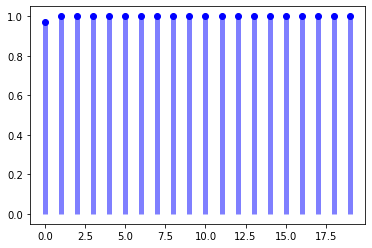

In [40]:
# your code here
# Please label the axes and give a title to the plot


#n=20
#p=0.001611 #is to use this one, the result from above?
#binomial = binom(n,p)

n=20
p=0.0016 #its this probability that i need to use or the first one 0.6?
binomial = binom(n,p)

x = np.arange(0,20)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.cdf(x, n, p), 'bo')
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5) # you can change here the pmf for the cdf


#Class example:
#n=10
#p=0.5
#binomial = binom(n,p)
#print(binomial.pmf(3)) # a probabilidade de ter 3 sucessos
#print(binomial.cdf(3))
#print(binomial.mean())
#print(binomial.var())
#print(binomial.std())
#print(binomial.rvs(15))
#x = np.arange(0,11)
#fig, ax = plt.subplots(1, 1)
#ax.plot(x, binom.pmf(x, n, p), 'bo')
#ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5) # you can change here the pmf for the cdf 

#trocar o pfd para cdf


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [52]:
# your code here

mu = 2.3 #média da função (median of goals in match)

prob_part= poisson.pmf(5, mu)
prob_part


#class example:
#mu = 1
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#x = np.arange(poisson.ppf(0.00001, mu), poisson.ppf(0.9999, mu))
#plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
#plt.show()



#import math
#math.exp(2.3) # n is the number you want to find the factorial of (???)


#Syntax of math.exp() method:
#math.exp(n)
#Parameter(s): n – an integer or a float number.
#Return value: float – it returns a float value that is an exponential form of the number n.


0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

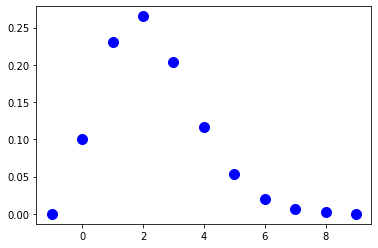

In [44]:
# your code here
# Please label the axes and give a title to the plot 

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0, mu), poisson.ppf(0.9999, mu))
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=10, label='poisson pmf')
plt.show()

#class example:
#mu = 1
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#x = np.arange(poisson.ppf(0.00001, mu), poisson.ppf(0.9999, mu))
#plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
#plt.show()


In [14]:



#studyng time:
#The binomial distribution formula is:
#b(x; n, P) = nCx * Px * (1 – P)n – x
#Where:
#b = binomial probability
#x = total number of “successes” (pass or fail, heads or tails etc.)
#P = probability of a success on an individual trial
#n = number of trials

#Note: The binomial distribution formula can also be written in a slightly different way, 
#because nCx = n!/x!(n-x)! (this binomial distribution formula uses factorials (What is a factorial?). 
#“q” in this formula is just the probability of failure (subtract your probability of success from 1).binomialprobabilityformula
